<a href="https://colab.research.google.com/github/Meta-user-byte/Qpoland_classiq_challenge/blob/main/some_python_programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

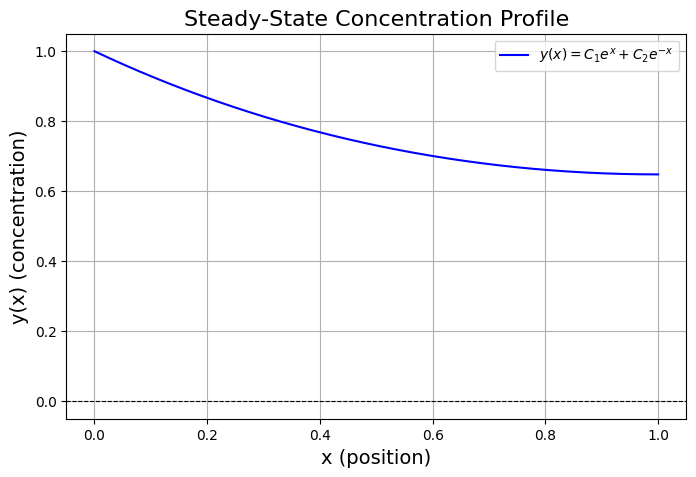

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
C1 = 1 / (1 + np.exp(2))  # Coefficient of e^x
C2 = np.exp(2) / (1 + np.exp(2))  # Coefficient of e^(-x)

# Function definition
def y(x):
    return C1 * np.exp(x) + C2 * np.exp(-x)

# Generate x values
x = np.linspace(0, 1, 500)

# Compute y values
y_values = y(x)

# Plot the solution
plt.figure(figsize=(8, 5))
plt.plot(x, y_values, label=r"$y(x) = C_1 e^x + C_2 e^{-x}$", color="blue")
plt.title("Steady-State Concentration Profile", fontsize=16)
plt.xlabel("x (position)", fontsize=14)
plt.ylabel("y(x) (concentration)", fontsize=14)
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.legend()
plt.show()


Enter the length of the rod: 10
Enter the temperature at the left end (°C): 8
Enter the temperature at the right end (°C): 9


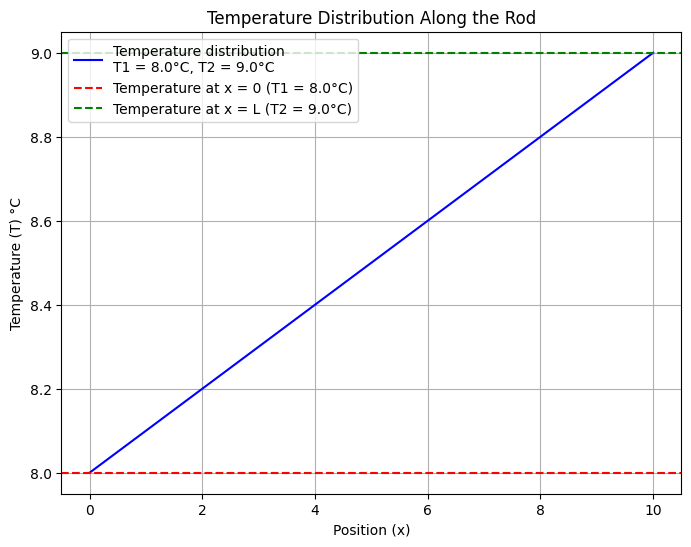

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function for temperature distribution
def temperature_distribution(x, L, T1, T2):
    return T1 + (T2 - T1) * (x / L)

# Inputs
L = float(input("Enter the length of the rod: "))
T1 = float(input("Enter the temperature at the left end (°C): "))
T2 = float(input("Enter the temperature at the right end (°C): "))

# Generate x values and compute T values
x_values = np.linspace(0, L, 100)
T_values = temperature_distribution(x_values, L, T1, T2)

# Plot the temperature distribution
plt.figure(figsize=(8, 6))
plt.plot(x_values, T_values, label=f'Temperature distribution\nT1 = {T1}°C, T2 = {T2}°C', color='blue')
plt.title("Temperature Distribution Along the Rod")
plt.xlabel('Position (x)')
plt.ylabel('Temperature (T) °C')

# Add horizontal lines for T1 and T2
plt.axhline(y=T1, color='red', linestyle='--', label=f'Temperature at x = 0 (T1 = {T1}°C)')
plt.axhline(y=T2, color='green', linestyle='--', label=f'Temperature at x = L (T2 = {T2}°C)')

# Add grid, legend, and show the plot
plt.grid(True)
plt.legend()
plt.show()


In [17]:
import cmath

def dft(x):
    N = len(x)
    result = []  # Use a separate list to store results

    for k in range(N):
        sum = 0
        for n in range(N):
            angle = -2j * cmath.pi * k * n / N
            sum += x[n] * cmath.exp(angle)
        result.append(sum)  # Append the computed value to the result
    return result  # Return the full result after the loop

# Input sequence
x = [1, 2, 3, 4]

# Compute the DFT
dft_result = dft(x)

# Print the sequence and DFT result
print("Input sequence:", x)
print("DFT result:")

for k, value in enumerate(dft_result):
    print(f"x[{k}] = {value}")


Input sequence: [1, 2, 3, 4]
DFT result:
x[0] = (10+0j)
x[1] = (-2.0000000000000004+1.9999999999999996j)
x[2] = (-2-9.797174393178826e-16j)
x[3] = (-1.9999999999999982-2.000000000000001j)


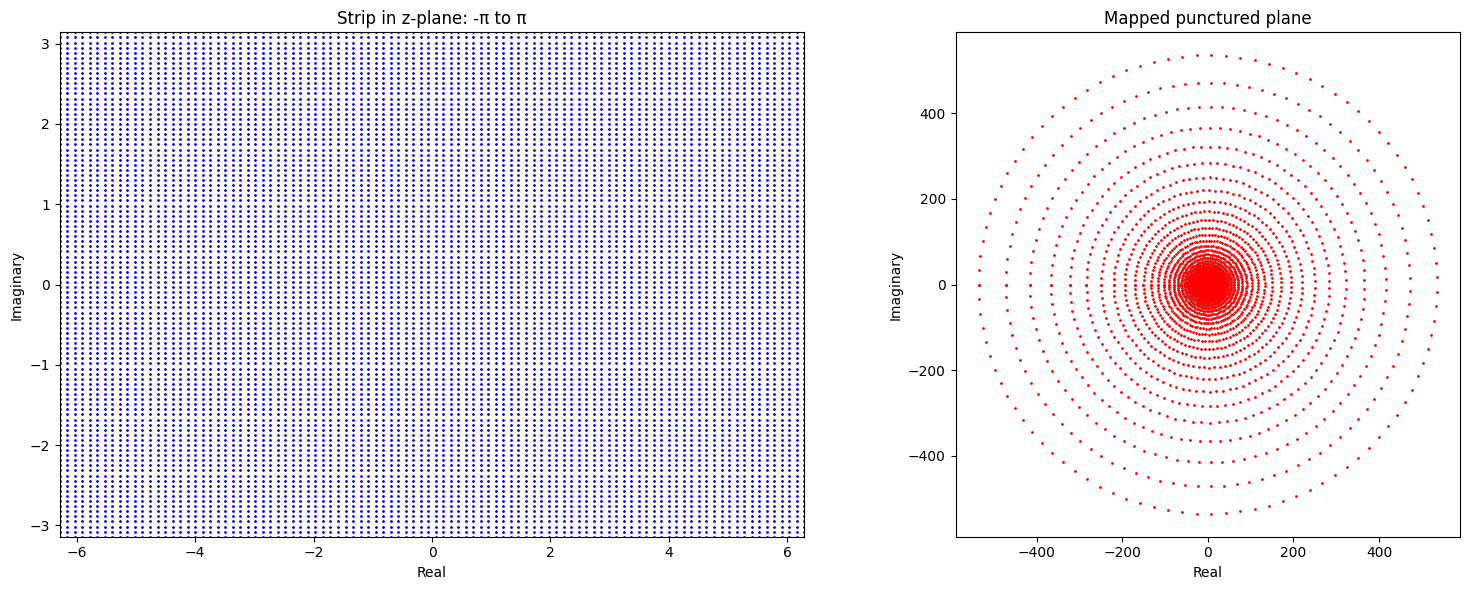

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x and y
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)

# Create a meshgrid
X, Y = np.meshgrid(x, y)

# Complex grid Z
Z = X + 1j * Y

# Apply the mapping w = e^z
w = np.exp(Z)

# Create the plots
plt.figure(figsize=(16, 6))

# Plot in the z-plane (Real vs Imaginary)
plt.subplot(1, 2, 1)
plt.scatter(Z.real, Z.imag, c='b', s=1)
plt.title('Strip in z-plane: -π to π')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.ylim(-np.pi, np.pi)

# Plot in the w-plane (Real vs Imaginary after mapping)
plt.subplot(1, 2, 2)
plt.scatter(w.real, w.imag, c='r', s=1)
plt.title('Mapped punctured plane')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.gca().set_aspect('equal')

# Show the plots
plt.tight_layout()
plt.show()


In [27]:
import numpy as np

def f(x, func):
    """Evaluates the function."""
    return func(x)

# Input the function
function_expression = input("Enter the function in terms of x (e.g., x**2 or np.sin(x)): ")
func = lambda x: eval(function_expression)

# Input limits and points
a = float(input("Enter the lower limit a: "))
b = float(input("Enter the upper limit b: "))
n = int(input("Enter the number of points (e.g., 2, 3, or more for accuracy): "))

# Get Gaussian quadrature points and weights
x, w = np.polynomial.legendre.leggauss(n)

# Transform the points for the interval [a, b]
transformed_x = (b - a) / 2 * x + (b + a) / 2

# Calculate the integral
integral = sum(w * f(transformed_x, func)) * (b - a) / 2

# Output the result
print(f"The integral of {function_expression} from {a} to {b} is approximately: {integral:.6f}")


Enter the function in terms of x (e.g., x**2 or np.sin(x)): np.sin(x)
Enter the lower limit a: 2
Enter the upper limit b: 9
Enter the number of points (e.g., 2, 3, or more for accuracy): 3
The integral of np.sin(x) from 2.0 to 9.0 is approximately: 0.298400


In [29]:
import numpy as np

def f(x, func):
    """Evaluates the function."""
    return func(x)

# Input the function
function_expression = input("Enter the function in terms of x (e.g., x**2 or np.sin(x)): ")
func = lambda x: eval(function_expression)

# Input the number of points
n = int(input("Enter the number of points for Hermite-Gauss quadrature (e.g., 2, 3, 4...): "))

# Get Hermite-Gauss points and weights
x, w = np.polynomial.hermite.hermgauss(n)

# Calculate the integral using Hermite-Gauss quadrature
integral = sum(w * f(x, func))

# Output the result
print(f"The integral of {function_expression} with Hermite-Gauss quadrature is approximately: {integral:.6f}")


Enter the function in terms of x (e.g., x**2 or np.sin(x)): np.exp(-x**2)
Enter the number of points for Hermite-Gauss quadrature (e.g., 2, 3, 4...): 2
The integral of np.exp(-x**2) with Hermite-Gauss quadrature is approximately: 1.075048
